[Source](http://laspy.readthedocs.io/en/latest/tut_part_1.html)

In [1]:
from __future__ import print_function
%matplotlib inline
import laspy
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

from numpy import linspace, meshgrid
import numpy as np
from pprint import pprint
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [2]:
las_file = r'C:\Users\slawler\Repos\lidar\2014_574000e_4395500n_las.las'
inFile = laspy.file.File(las_file, mode = "r")

# Grab all of the points from the file.
point_records = inFile.points

In [3]:
# Find out what the point format looks like.
pointformat = inFile.point_format
for spec in inFile.point_format:
    print(spec.name)

X
Y
Z
intensity
flag_byte
raw_classification
scan_angle_rank
user_data
pt_src_id
gps_time
red
green
blue


In [4]:
#Lets take a look at the header also.
headerformat = inFile.header.header_format
for i, spec in enumerate(headerformat):
    print(i, spec.name)

0 file_sig
1 file_source_id
2 global_encoding
3 proj_id_1
4 proj_id_2
5 proj_id_3
6 proj_id_4
7 version_major
8 version_minor
9 system_id
10 software_id
11 created_day
12 created_year
13 header_size
14 data_offset
15 num_variable_len_recs
16 data_format_id
17 data_record_length
18 point_records_count
19 point_return_count
20 x_scale
21 y_scale
22 z_scale
23 x_offset
24 y_offset
25 z_offset
26 x_max
27 x_min
28 y_max
29 y_min
30 z_max
31 z_min


In [5]:
# Grab just the X dimension from the file, and scale it.
def scaled_x_dimension(las_file):
    x_dimension = las_file.X
    scale = las_file.header.scale[0]
    offset = las_file.header.offset[0]
    print(offset)
    return(x_dimension*scale + offset)

def scaled_y_dimension(las_file):
    y_dimension = las_file.Y
    scale = las_file.header.scale[0]
    offset = las_file.header.offset[0]
    print(offset)
    return(y_dimension*scale + offset)

scaled_x = scaled_x_dimension(inFile)
scaled_y = scaled_y_dimension(inFile)

-0.0
-0.0


In [6]:
xmin = inFile.header.min[0]
xmax = inFile.header.max[0]

ymin = inFile.header.min[1]
ymax = inFile.header.max[1]

zmin = inFile.header.min[2]
zmax = inFile.header.max[2]

print(xmin, xmax, ymin, ymax)
print(zmin, zmax)

574000.0 574499.99 4395000.0 4395499.99
-349.05 120.18


In [7]:
lower_x = 574001
lower_y = 43950001

xs = pd.Series(scaled_x)
ys = pd.Series(scaled_y)
zs = pd.Series(inFile.z)

x_idx = xs[xs < lower_x].index
y_idx = ys[ys < lower_y].index

master_idx = pd.Series(list(set(x_idx).intersection(set(y_idx))))

x = xs[master_idx].values
y = ys[master_idx].values
z = zs[master_idx].values

print(x.shape[0]*y.shape[0])

63664441


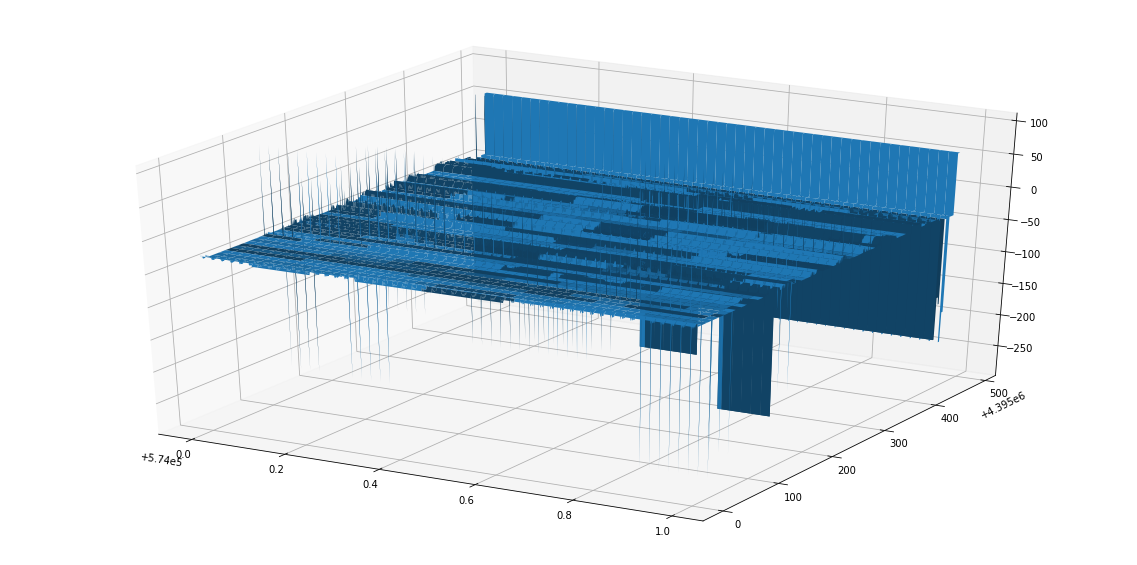

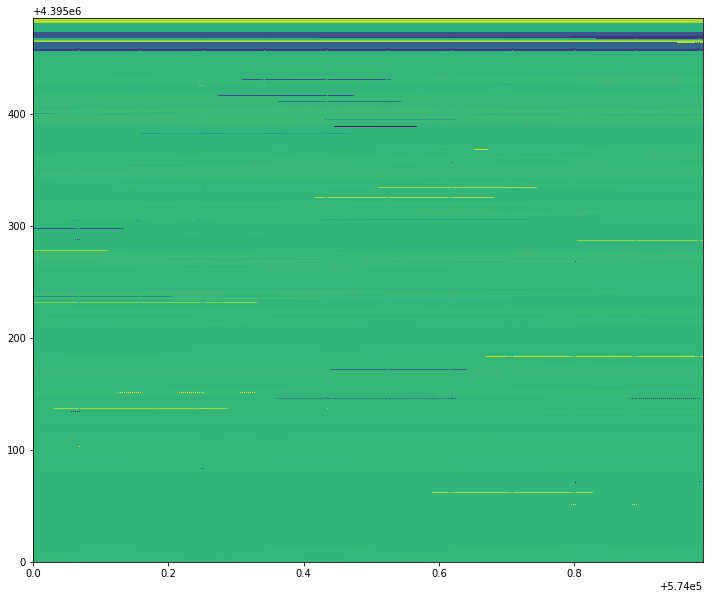

In [8]:
def grid(x, y, z, resX=1000, resY=1000):
    "Convert 3 column data to matplotlib grid"
    grid_x, grid_y = np.mgrid[min(x): max(x):1j * resX, min(y): max(y):1j * resY]
    Z = griddata(np.array(zip(x, y)), np.array(z), (grid_x, grid_y), method='nearest')
    return grid_x, grid_y, Z


X,Y,Z =  grid(x,y,z)

fig = plt.figure(figsize=(20,10))
ax = fig.gca(projection='3d')

ax.plot_surface(X,Y,Z)
plt.show()

fig = plt.figure(figsize=(12,10))
ax = fig.gca()

ax.pcolormesh(X, Y,Z)
plt.show()


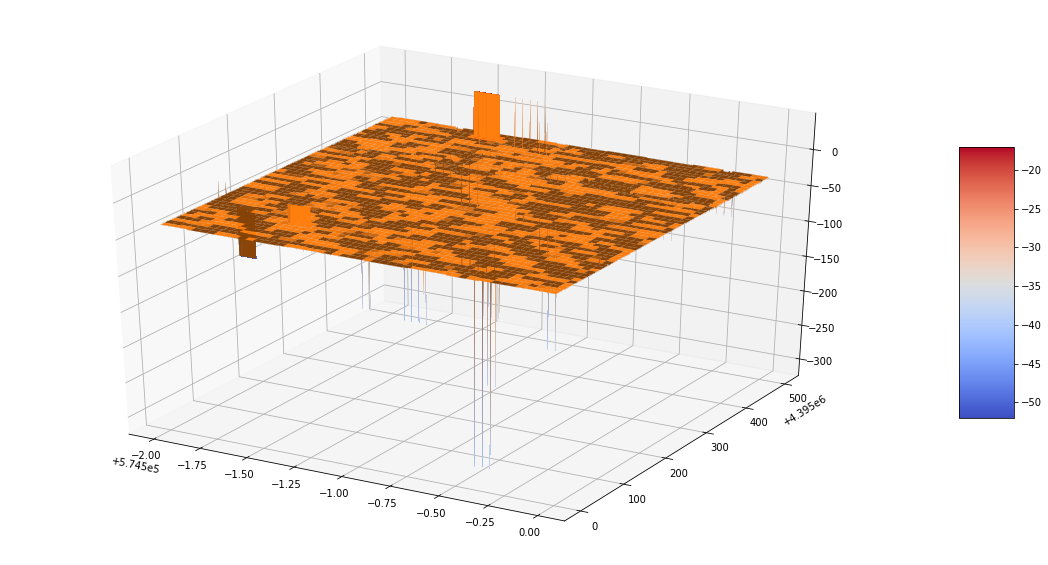

In [12]:
from matplotlib import cm

upper_x = 574498
lower_y = 43950001

xs = pd.Series(scaled_x)
ys = pd.Series(scaled_y)
zs = pd.Series(inFile.z)

x_idx = xs[xs > upper_x].index
y_idx = ys[ys < lower_y].index

master_idx = pd.Series(list(set(x_idx).intersection(set(y_idx))))

x = xs[master_idx].values
y = ys[master_idx].values
z = zs[master_idx].values


X,Y,Z =  grid(x,y,z)



fig = plt.figure(figsize=(20,10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)


ax.plot_surface(X,Y,Z, )

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()